<a href="https://colab.research.google.com/github/Hemu2503/EDA-DA/blob/main/Module_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 5: Diabetes Dataset Clustering Analysis using K-Means

**Name**: Hemanth Vundavilli
**Registration Number**: 21BDS0253

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [2]:

# Load the dataset
url = 'https://github.com/Hemanth-Vundavilli/EDA-DA/blob/main/Benefits.csv?raw=true'
data = pd.read_csv(url)

# Define the numerical columns for clustering
numerical_columns = ['stateur', 'statemb', 'state', 'age', 'tenure', 'yrdispl', 'rr']

# Standardize the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])


Cluster Means:
                  stateur     statemb      state        age     tenure  \
KMeans_Cluster                                                          
0               8.984298  156.206114  58.954145  32.828161   3.729968   
1               7.193838  176.706033  47.641849  49.430039  16.472401   
2               5.998040  209.477566  48.040227  34.463125   3.475503   

                 yrdispl        rr  
KMeans_Cluster                      
0               2.725799  0.427547  
1               5.129653  0.398490  
2               7.992264  0.466434  


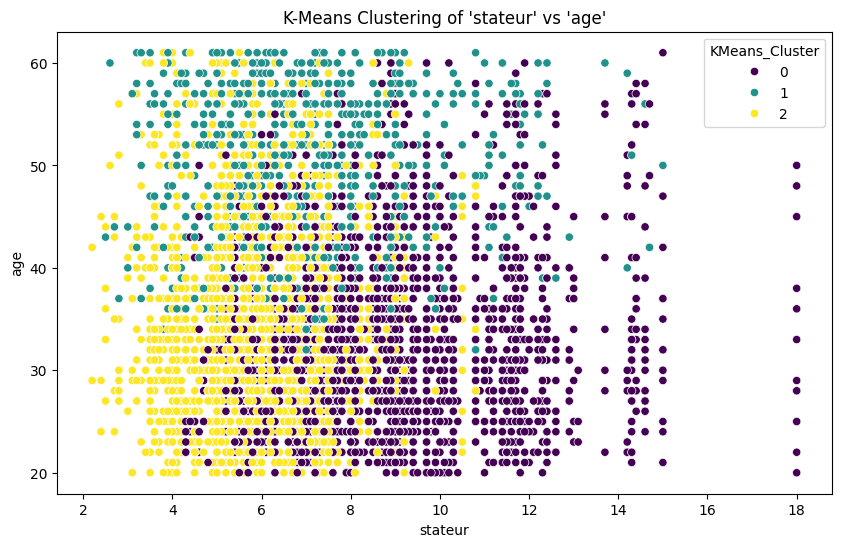

In [3]:

# 5.2 K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# 5.3 Cluster Means Analysis
cluster_means = data.groupby('KMeans_Cluster')[numerical_columns].mean()
print("Cluster Means:\n", cluster_means)

# 5.4 Visualizing K-Means Clusters (using 'stateur' vs 'age')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='stateur', y='age', hue='KMeans_Cluster', palette='viridis')
plt.title("K-Means Clustering of 'stateur' vs 'age'")
plt.xlabel("stateur")
plt.ylabel("age")
plt.show()

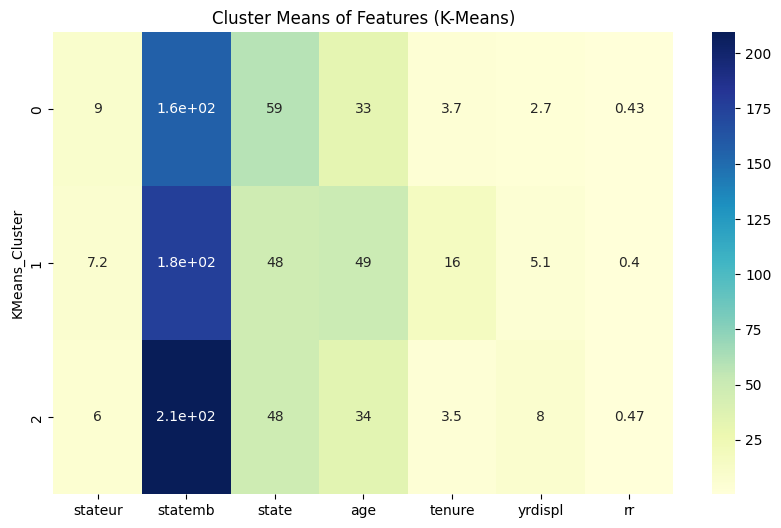

In [4]:
# 5.5 Heatmap of Feature Means per Cluster
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap="YlGnBu")
plt.title("Cluster Means of Features (K-Means)")
plt.show()

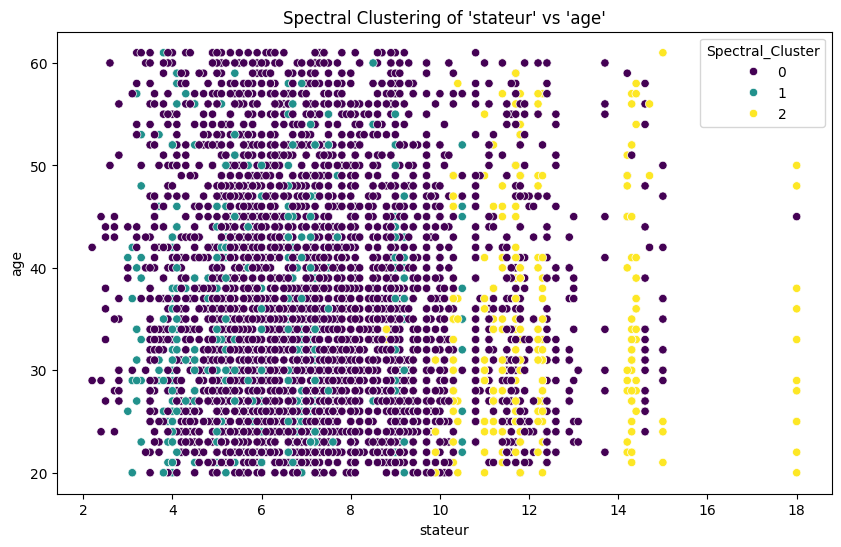

In [5]:
# 5.6 Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
data['Spectral_Cluster'] = spectral.fit_predict(scaled_data)

# 5.6.1 Visualizing Spectral Clustering (using 'stateur' vs 'age')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='stateur', y='age', hue='Spectral_Cluster', palette='viridis')
plt.title("Spectral Clustering of 'stateur' vs 'age'")
plt.xlabel("stateur")
plt.ylabel("age")
plt.show()

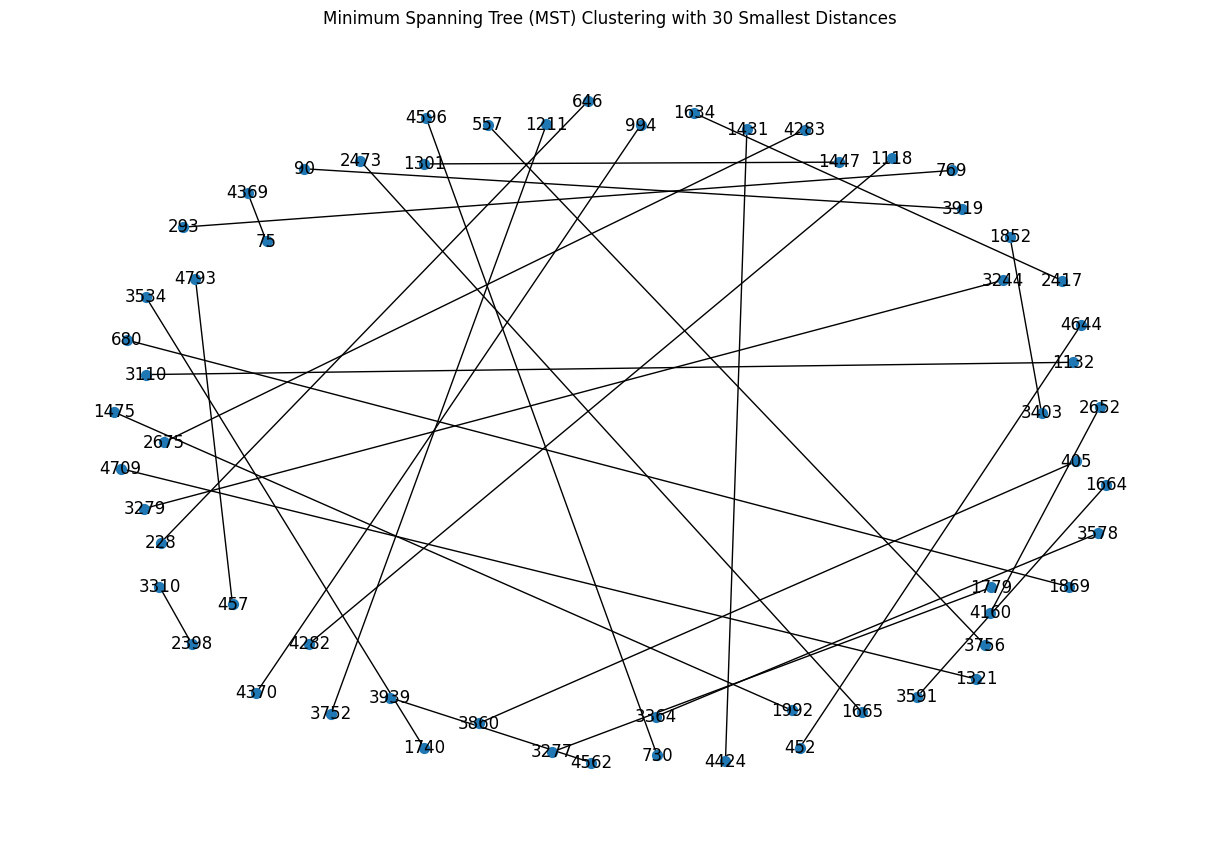

In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

# 5.7 Minimum Spanning Tree (MST) Clustering
# Compute pairwise distances between data points
distances = euclidean_distances(scaled_data)

# Flatten the distance matrix and get the indices of the smallest 20-30 distances
distances_flat = distances[np.triu_indices(len(distances), k=1)]  # Get upper triangular part to avoid duplicates
sorted_indices = np.argsort(distances_flat)[:30]  # Get indices of the 30 smallest distances

# 5.7.1 Create the graph for MST & Computing it (using the smallest 30 distances)
G = nx.Graph()
for idx in sorted_indices:
    i, j = np.triu_indices(len(distances), k=1)[0][idx], np.triu_indices(len(distances), k=1)[1][idx]
    G.add_edge(i, j, weight=distances[i][j])

# Compute the MST
mst = nx.minimum_spanning_tree(G)

# 5.7.2 Visualize the MST structure
plt.figure(figsize=(12, 8))
nx.draw(mst, with_labels=True, node_size=50, font_size=12)
plt.title("Minimum Spanning Tree (MST) Clustering with 30 Smallest Distances")
plt.show()

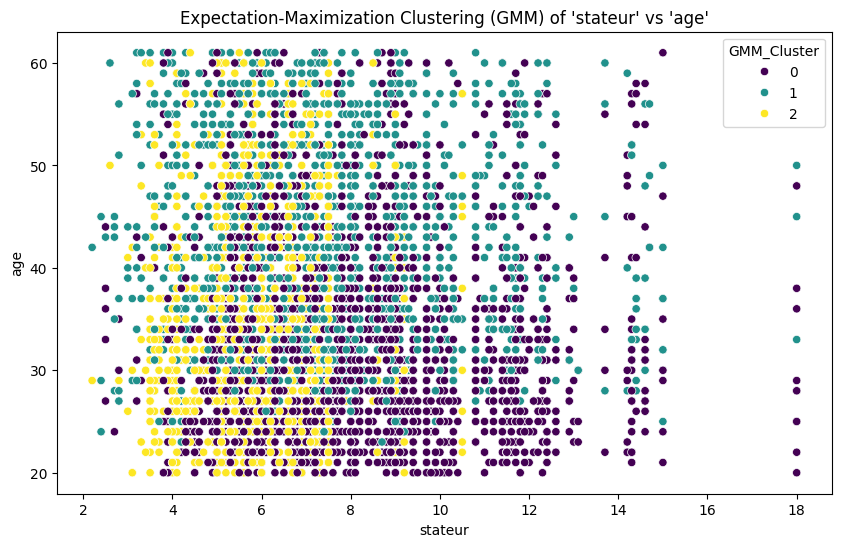

In [7]:
# 5.8 Model-Based Clustering using Expectation-Maximization (EM)
gmm = GaussianMixture(n_components=3, random_state=42)
data['GMM_Cluster'] = gmm.fit_predict(scaled_data)

# 5.8.1 Visualizing the GMM clusters (using 'stateur' vs 'age')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='stateur', y='age', hue='GMM_Cluster', palette='viridis')
plt.title("Expectation-Maximization Clustering (GMM) of 'stateur' vs 'age'")
plt.xlabel("stateur")
plt.ylabel("age")
plt.show()

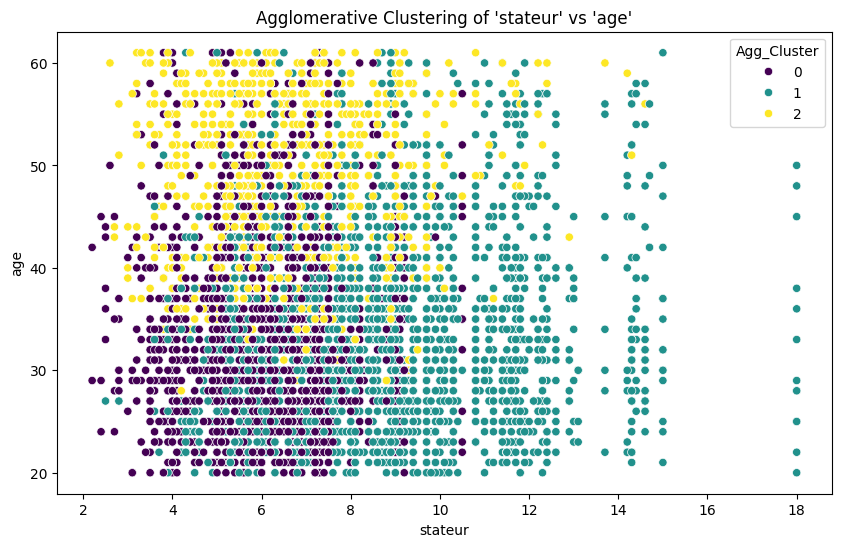

In [8]:
# 5.9 Hierarchical Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
data['Agg_Cluster'] = agg_clustering.fit_predict(scaled_data)

# 5.9.1 Visualizing the Agglomerative Clustering (using 'stateur' vs 'age')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='stateur', y='age', hue='Agg_Cluster', palette='viridis')
plt.title("Agglomerative Clustering of 'stateur' vs 'age'")
plt.xlabel("stateur")
plt.ylabel("age")
plt.show()

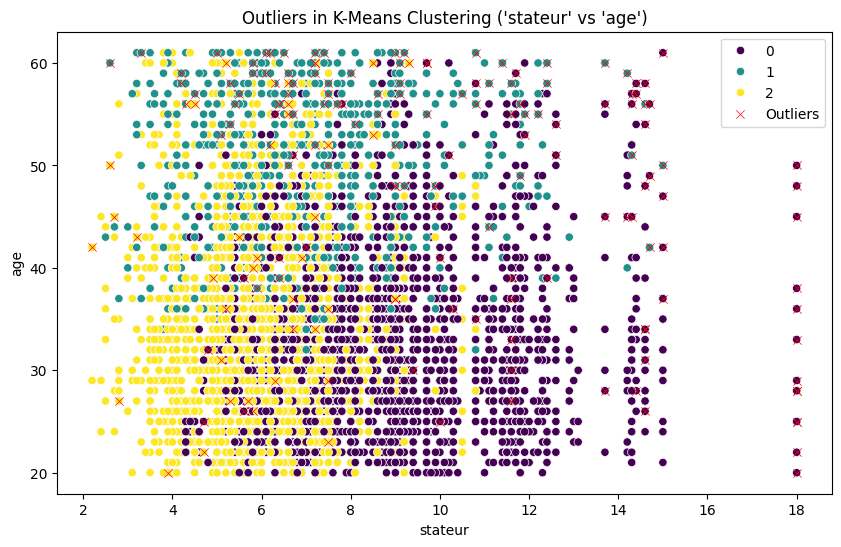

In [9]:
# 5.10 Outlier Detection using K-Means Clustering
distances_to_centroid = kmeans.transform(scaled_data).min(axis=1)
outlier_threshold = distances_to_centroid.mean() + 2 * distances_to_centroid.std()
outliers = data[distances_to_centroid > outlier_threshold]

# 5.10.1 Visualizing outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='stateur', y='age', hue='KMeans_Cluster', palette='viridis')
sns.scatterplot(data=outliers, x='stateur', y='age', color='red', marker='x', label='Outliers')
plt.title("Outliers in K-Means Clustering ('stateur' vs 'age')")
plt.xlabel("stateur")
plt.ylabel("age")
plt.legend()
plt.show()
